# DataCarma: Колёса судьбы



Кратко о сути проекта: в поисках лучшего датасета мы 69 дней и ночей скитались по сайтам разным и в результате нашли её - гибддшную выкладку по ДТП (частично есть за 2025 год, но мы решили взять полную за 2015-2024 года). Какая информация там есть? Вполне себе интересная: от долготы и широты иницидента, до состояния здоровья пассажира (понятно, что базовая инфа время ~~встречи изменить нельзя~~ дтп, город, марка траснпорта, стаж водителя и тд там тоже имеется)

Теперь по датасету у нас есть две таблички: 
1. accidents
2. vehicles
   
Их мы джоиним и получаем итоговую таблоиду для изучения 

Чуть конкретнее по структуре:
- accidents:
  * id - хеджхогу понятно - int
  * tags - Тип ДТП по наличию пострадавших пешеходов и детей - str
  * category - Категория ДТП, например «Наезд на пешехода» и «Опрокидывание» - str
  * region - Регион, в котором произошло ДТП - str
  * county - Город или район - str
  * longitude - Долгота - float
  * latitude - Широта - float 
  * nearby - Объекты, которые находятся вблизи - str
  * datetime - Дата и время ДТП - str
  * light - Nаличие дневного и искусственного sveta (sharaut) - str
  * weather - Погодные условия, например «Ясно, ~~Понятно~~ Ураганный ветер», «Снегопад, Туман» - str
  * road_conditions - Состояние дорожного покрытия - str
  * participants_count - Количество участников ДТП - int
  * participant_categories - Категории участников ДТП, например «Пешеходы», «Велосипедисты», «Дети» - str
  * severity - Тяжесть ДТП по степени вреда здоровью («Легкий», «Тяжёлый», «С погибшими») - str
  * dead_count - Количество погибших в ДТП - int
  * injured_count - Количество раненных в ДТП - int
- vehicles:
  * accident_id - id ДТП, используется для связи с accidents и vehicles - int
  * vehicle_id - id vehicle, используется для связи с таблицей об участниках ДТП (participants) - но мы ее пока решили не трогать, так что неактуально - int
  * category - Категория транспортного средства - str
  * brand - Марка поло транспортного средства - str
  * model - Модель транспортного средства - str
  * color - Цвет транспортного средства (зеленоглазого такси)- str
  * year - Год производства транспортного средства - int
  
А после джоин~~т~~а мы ходим выводить:
'accident_id', 'accident_category, 'weather', 'road_conditions', 'participants_count', 'severity', 'dead_count', 'injured_count', 'vehicle_category' 'brand', 'model', 'color', 'year'

Вот такие пироги

# Твои слова - кодица:

раз доллар упал, бегом импортировать:

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 50)
pd.set_option('display.float_format',  '{:.2f}'.format)
pd.set_option('display.max_colwidth', 30)

In [200]:
# Пути к файлам с данными
data_path = "data/"
accidents_file = data_path + "accidents.csv"
vehicles_file = data_path + "vehicles.csv"

# Загрузка данных
accidents = pd.read_csv(accidents_file, sep=";", encoding="utf-8")
print("чуть инфы про дтпшки")
accidents.info()
accidents.isnull().sum()
accidents.describe().T
accidents.nunique()
accidents

чуть инфы про дтпшки
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440208 entries, 0 to 1440207
Data columns (total 18 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   id                      1440208 non-null  int64  
 1   tags                    1440208 non-null  object 
 2   category                1440208 non-null  object 
 3   region                  1440208 non-null  object 
 4   county                  1440208 non-null  object 
 5   address                 1370911 non-null  object 
 6   longitude               1429464 non-null  float64
 7   latitude                1429464 non-null  float64
 8   nearby                  1082922 non-null  object 
 9   datetime                1440208 non-null  object 
 10  light                   1440208 non-null  object 
 11  weather                 1440208 non-null  object 
 12  road_conditions         1440208 non-null  object 
 13  participants_count      1440208 non-

,id,tags,category,region,county,address,longitude,latitude,nearby,datetime,light,weather,road_conditions,participants_count,participant_categories,severity,dead_count,injured_count
0,2869171,Дорожно-транспортные проис...,Наезд на пешехода,Алтайский край,Барнаул,NaN,83.79,53.39,Жилые дома индивидуальной ...,2023-05-24 19:30:00,Светлое время суток,Ясно,Сухое,2,"Все участники, Пешеходы, М...",Легкий,0,1
1,2320091,Дорожно-транспортные проис...,Иной вид ДТП,Алтайский край,Барнаул,"г Барнаул, ул Сиреневая, 11",83.67,53.35,Многоквартирные жилые дома...,2015-09-16 13:00:00,Светлое время суток,Пасмурно,Сухое,2,"Дети, Все участники",Легкий,0,1
2,2321011,Дорожно-транспортные проис...,Падение пассажира,Алтайский край,Барнаул,"г Барнаул, ул Попова, 165",83.40,53.20,"Административные здания, О...",2017-08-25 15:30:00,Светлое время суток,Ясно,Сухое,3,"Дети, Все участники",Легкий,0,1
3,2576909,Дорожно-транспортные проис...,Столкновение,Алтайский край,Барнаул,"г Барнаул, ул Петра Сухова...",83.71,53.38,Выезд с прилегающей террит...,2021-05-29 19:40:00,Светлое время суток,Ясно,"Сухое, Отсутствие, плохая ...",3,"Мотоциклисты, Все участники",Тяжёлый,0,1
4,2547743,Дорожно-транспортные проис...,Столкновение,Алтайский край,Барнаул,"г Барнаул, Объездная дорог...",83.71,53.29,"Эстакада, путепровод",2021-02-22 13:50:00,Светлое время суток,Ясно,Обработанное противогололе...,4,Все участники,Тяжёлый,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440203,2376263,Дорожно-транспортные проис...,Наезд на препятствие,Забайкальский край,пос. Горный,"п Горный, МЕСТНЫЕ ДОРОГИ, ...",113.02,51.56,NaN,2019-11-11 07:10:00,Светлое время суток,Ясно,Недостатки зимнего содержа...,1,Все участники,Легкий,0,1
1440204,2376542,Дорожно-транспортные проис...,Наезд на препятствие,Забайкальский край,пос. Горный,"п Горный, МЕСТНЫЕ ДОРОГИ, ...",113.02,51.55,Нерегулируемый перекрёсток,2016-12-16 06:30:00,"В темное время суток, осве...",Ясно,Сухое,3,Все участники,Легкий,0,3
1440205,2377463,Дорожно-транспортные проис...,Съезд с дороги,Забайкальский край,пос. Горный,"ГОРНЫЙ - ГОРНЫЙ 1, 1 км",112.89,51.40,Нерегулируемый перекрёсток...,2015-09-27 20:35:00,"В темное время суток, осве...",Пасмурно,Сухое,2,Все участники,Тяжёлый,0,2
1440206,2381588,Дорожно-транспортные проис...,Наезд на велосипедиста,Забайкальский край,пос. Горный,"п Горный, МЕСТНЫЕ ДОРОГИ, ...",113.04,51.55,Многоквартирные жилые дома,2019-07-08 19:30:00,Светлое время суток,Пасмурно,Мокрое,2,"Велосипедисты, Дети, Все у...",Легкий,0,1


In [203]:
vehicles = pd.read_csv(vehicles_file, sep=";", encoding="utf-8")
print("и еще немного про вехиклы")
vehicles.info()
vehicles.isnull().sum()
vehicles.nunique()
vehicles.describe().T
vehicles

и еще немного про вехиклы
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2273037 entries, 0 to 2273036
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   accident_id  int64  
 1   vehicle_id   object 
 2   category     object 
 3   brand        object 
 4   model        object 
 5   color        object 
 6   year         float64
dtypes: float64(1), int64(1), object(5)
memory usage: 121.4+ MB


,accident_id,vehicle_id,category,brand,model,color,year
0,2869171,2869171_1,Мопеды с двигателем внутре...,Прочие марки ТС,Прочие марки и модели ТС,Черный,2015.00
1,2320091,2320091_1,"С-класс (малый средний, ко...",TOYOTA,Corolla,Серый,2002.00
2,2321011,2321011_1,Одноэтажные длиной от 8 до...,DAIMLER,Прочие модели DAIMLER,Многоцветный,1981.00
3,2576909,2576909_1,"В-класс (малый) до 3,9 м",HONDA,Torneo,Серый,2001.00
4,2576909,2576909_2,Мотоциклы,HONDA,Magna,Синий,1987.00
...,...,...,...,...,...,...,...
2273032,2376542,2376542_1,"С-класс (малый средний, ко...",TOYOTA,Ipsum,Многоцветный,1988.00
2273033,2377463,2377463_1,Минивэны и универсалы повы...,УАЗ,Прочие модели УАЗ,Иные цвета,2001.00
2273034,2381588,2381588_1,"В-класс (малый) до 3,9 м",TOYOTA,Land Cruiser,Серый,2004.00
2273035,2381588,2381588_2,Велосипеды,NaN,NaN,NaN,NaN


In [207]:
#чуть шаманим с именами, чтоб джоин сджоинился
accidents = accidents.rename(columns={"id": "accident_id", "category": "accident_category"})
vehicles = vehicles.rename(columns={"category": "vehicle_category"})

accidents.columns = accidents.columns.str.strip().str.lower()
vehicles.columns = vehicles.columns.str.strip().str.lower()
accidents["accident_id"] = accidents["accident_id"].astype(str)
vehicles["accident_id"] = vehicles["accident_id"].astype(str)

# Объединение данных и вывод полезных нам колонок
final_df = accidents.merge(vehicles, on="accident_id", how="left")
final_df = final_df[['accident_id', 'accident_category', 'weather', 'road_conditions', 'participants_count',
                     'severity', 'dead_count', 'injured_count', 'vehicle_category', 'brand', 
                     'model', 'color', 'year']]

# Сохраняем итоговый датасет и принтуем
print("и вот финальное чудо-юдо:")
final_df.to_csv(data_path + "final_dataset.csv", index=False)
final_df

и вот финальное чудо-юдо:


,accident_id,accident_category,weather,road_conditions,participants_count,severity,dead_count,injured_count,vehicle_category,brand,model,color,year
0,2869171,Наезд на пешехода,Ясно,Сухое,2,Легкий,0,1,Мопеды с двигателем внутре...,Прочие марки ТС,Прочие марки и модели ТС,Черный,2015.00
1,2320091,Иной вид ДТП,Пасмурно,Сухое,2,Легкий,0,1,"С-класс (малый средний, ко...",TOYOTA,Corolla,Серый,2002.00
2,2321011,Падение пассажира,Ясно,Сухое,3,Легкий,0,1,Одноэтажные длиной от 8 до...,DAIMLER,Прочие модели DAIMLER,Многоцветный,1981.00
3,2576909,Столкновение,Ясно,"Сухое, Отсутствие, плохая ...",3,Тяжёлый,0,1,"В-класс (малый) до 3,9 м",HONDA,Torneo,Серый,2001.00
4,2576909,Столкновение,Ясно,"Сухое, Отсутствие, плохая ...",3,Тяжёлый,0,1,Мотоциклы,HONDA,Magna,Синий,1987.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286093,2376542,Наезд на препятствие,Ясно,Сухое,3,Легкий,0,3,"С-класс (малый средний, ко...",TOYOTA,Ipsum,Многоцветный,1988.00
2286094,2377463,Съезд с дороги,Пасмурно,Сухое,2,Тяжёлый,0,2,Минивэны и универсалы повы...,УАЗ,Прочие модели УАЗ,Иные цвета,2001.00
2286095,2381588,Наезд на велосипедиста,Пасмурно,Мокрое,2,Легкий,0,1,"В-класс (малый) до 3,9 м",TOYOTA,Land Cruiser,Серый,2004.00
2286096,2381588,Наезд на велосипедиста,Пасмурно,Мокрое,2,Легкий,0,1,Велосипеды,NaN,NaN,NaN,NaN


#### Чуть чуть про то что получилось:
- итоговый датасет оч круто дополнила инфа о транспорте поскольку можно убрать отсюда всяких велосипедиков, они явно тут лишние
- можно заметить что некоторые аксидентс айди у разных строк одинаковые - они описывают по сути один инцидент, но с разных point of view
- ну и вроде у нас есть вся основная инфа позволяющая оценить че как куда кого, можно посмотреть на графики рисунки картинки

# First view visualization - чикс сюда чиназес и далее по списку

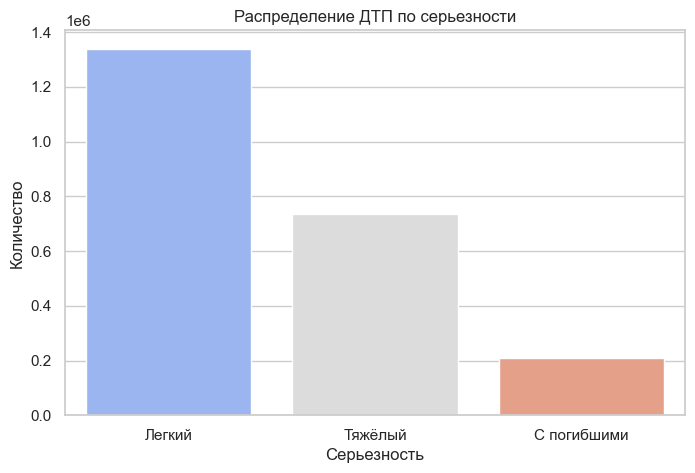

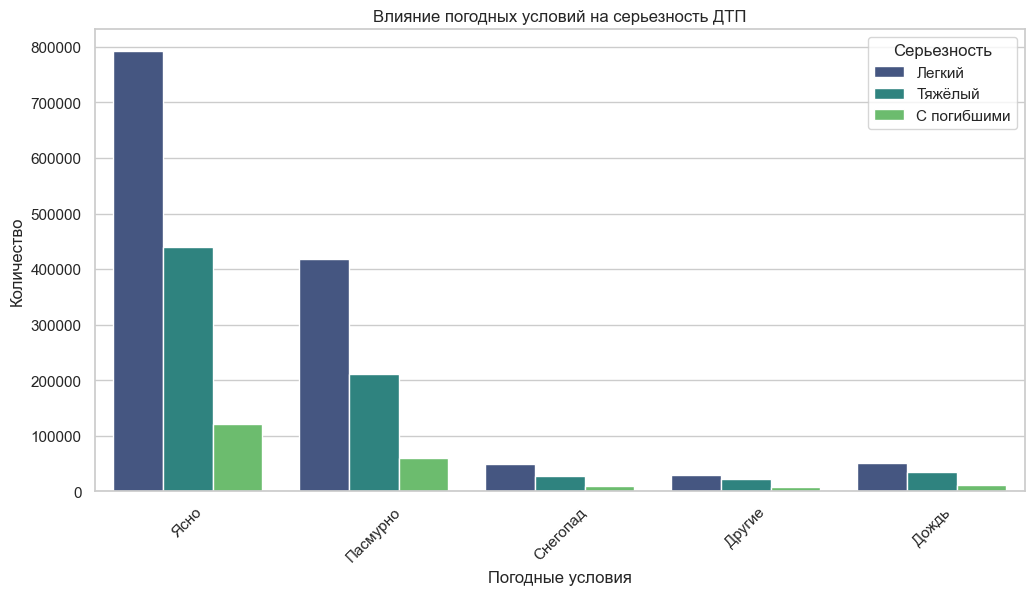

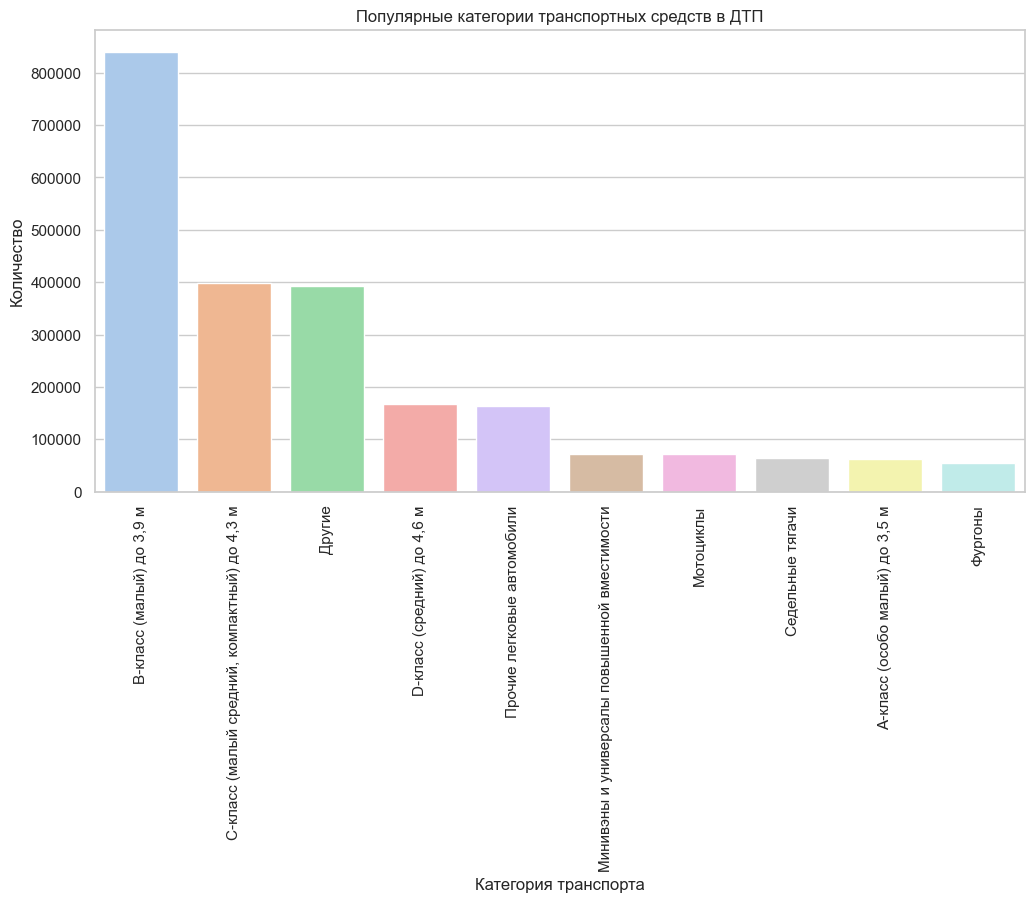

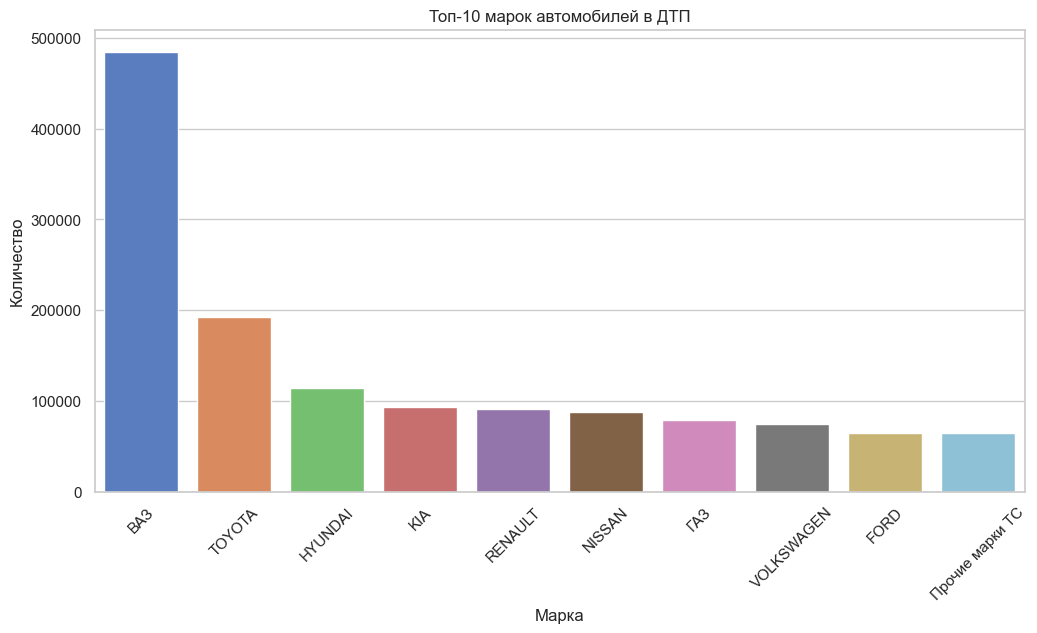

In [164]:
# Устанавливаем стиль графиков
sns.set_theme(style="whitegrid")

# Функция для группировки редких значений в "Другие"
def get_top_n_categories(df, column, n=10):
    top_n = df[column].value_counts().nlargest(n).index
    df[column] = df[column].apply(lambda x: x if x in top_n else "Другие")
    return df

# Ограничиваем топ категорий транспорта и погодных условий
final_df = get_top_n_categories(final_df, "vehicle_category", 10)
final_df = get_top_n_categories(final_df, "weather", 5)

# Визуализация серьезности ДТП
plt.figure(figsize=(8, 5))
sns.countplot(data=final_df, x="severity", order=final_df["severity"].value_counts().index, palette="coolwarm")
plt.title("Распределение ДТП по серьезности")
plt.xlabel("Серьезность")
plt.ylabel("Количество")
plt.show()

# Влияние погоды на серьезность аварий
plt.figure(figsize=(12, 6))
sns.countplot(data=final_df, x="weather", hue="severity", palette="viridis")
plt.title("Влияние погодных условий на серьезность ДТП")
plt.xlabel("Погодные условия")
plt.ylabel("Количество")
plt.xticks(rotation=45)
plt.legend(title="Серьезность")
plt.show()

# Популярные категории транспортных средств
plt.figure(figsize=(12, 6))
sns.countplot(data=final_df, x="vehicle_category", palette="pastel", order=final_df["vehicle_category"].value_counts().index)
plt.title("Популярные категории транспортных средств в ДТП")
plt.xlabel("Категория транспорта")
plt.ylabel("Количество")
plt.xticks(rotation=90)
plt.show()

# Топ-10 марок автомобилей в ДТП
plt.figure(figsize=(12, 6))
top_brands = final_df["brand"].value_counts().nlargest(10)
sns.barplot(x=top_brands.index, y=top_brands.values, palette="muted")
plt.title("Топ-10 марок автомобилей в ДТП")
plt.xlabel("Марка")
plt.ylabel("Количество")
plt.xticks(rotation=45)
plt.show()

Графики выше дали нам пищи для ума - а именно идеи для рисерча: 
- по какой причине ВАЗ - самая частая марка, фигурирующая в дтп? Машина небезопасная? Эту марку любят безответсвенные водители? Просто ВАЗа больше всего на дорогах? 
- есть поверье, что мотоциклисты на дорогах бьются сильно чаще автомобилистов, но на диаграмме они занимают лишь 7 место по дтп. С чем это связано? В абсолютных значениях дтп мало, надо смотреть в процентном соотношении? Или это вообще ~~порошок~~ миф 
- Многие автомобилисты винят пасмурную погоду и гололед во всех проблемах, но подавляющее большинство аварий случается в ясную погоду. В чём же тут дело? Может, стоит обратить внимание именно на тяжелые и летальные последтствия для адекватного сравнения?

Вот ряд тем, которые мы намерены разузнать:
1. Что же там с этими непутевыми (или все-таки как раз-таки путёвыми) мотоцицклистами, каков их вклад в тяжелые и летальные дтп. 
2. Почему ВАЗ в топе - это прямо интересно понять. Наши ставки - их заметно больше на дороге, чем остальных марок, но наверняка всё не так просто. Посмотрим корреляция между водительским стажем и частотой&тяжестью инцидентов
3. Как влияет погода - тоже элемент исследования

К формированию основных гипотез мы подойдем чуть позже (буквально завтра планировали - поэтому прямо вот магистральных вариантов в данном отчете не наблюдается. Опять же, в основной работе все будет - просто сейчас с тиммейтом редко пересекались, решим этот вопрос к дедлайну).

Спасибо за внимание и понимание! Всех благ!